In [1]:
from helisol import SunObservation, Time
from datetime import datetime, date, time, timedelta

Here we plot the analemma (linked to the equation of time), i.e. the position of the sun at a given time (UTC) every day throughout the year

In [2]:
coords = (47, 2)
observ_time = time(12, 0, 0)

In [3]:
d0 = date(2023, 1, 1)

# Every day of the year
heights = []
azimuths = []
for i in range(366):
    d = datetime.combine(d0, observ_time) + timedelta(days=i)
    obs = SunObservation(coords, utc_time=d)
    heights.append(obs.height.degrees)
    azimuths.append(obs.azimuth.degrees)

# Specific points (solstices, equinoxes)
equinoxes = date(2023, 3, 20), date(2023, 9, 23)
solstices = date(2023, 6, 21), date(2023, 12, 21)
hpts = []
azpts = []
for dpt in equinoxes + solstices:
    d = datetime.combine(dpt, observ_time) + timedelta(days=i)
    obs = SunObservation(coords, utc_time=d)
    hpts.append(obs.height.degrees)
    azpts.append(obs.azimuth.degrees)

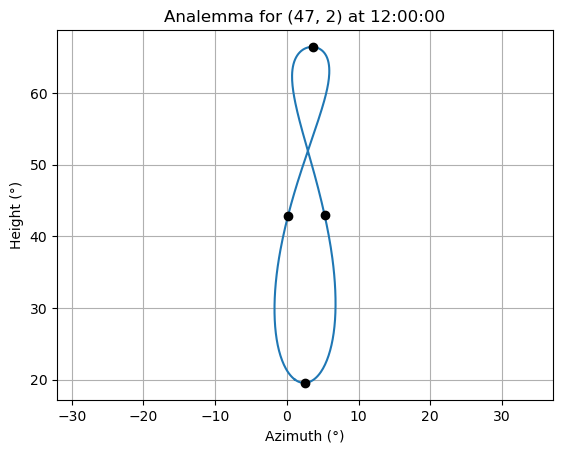

In [4]:
fig, ax = plt.subplots()
ax.plot(azimuths, heights)
ax.plot(azpts, hpts, 'ok')
ax.axis('equal')
ax.set_xlabel('Azimuth (°)')
ax.set_ylabel('Height (°)')
ax.set_title(f'Analemma for {coords} at {observ_time}')
ax.grid()